Load and Inspect the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [2]:
# Load dataset
df = pd.read_csv("admission_data.csv")

# Display the first few rows
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Display the summary statistics
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Data Cleaning and Transformation

In [4]:
# Rename columns to remove trailing spaces
df.rename(columns={'Chance of Admit ': 'Chance of Admit', 'LOR ': 'LOR'}, inplace=True)

# Convert target variable to binary classification
df['Admit'] = np.where(df['Chance of Admit'] >= 0.75, 1, 0)

# Drop the original Chance of Admit column
df.drop(columns=['Chance of Admit'], inplace=True)

Visualization of Data

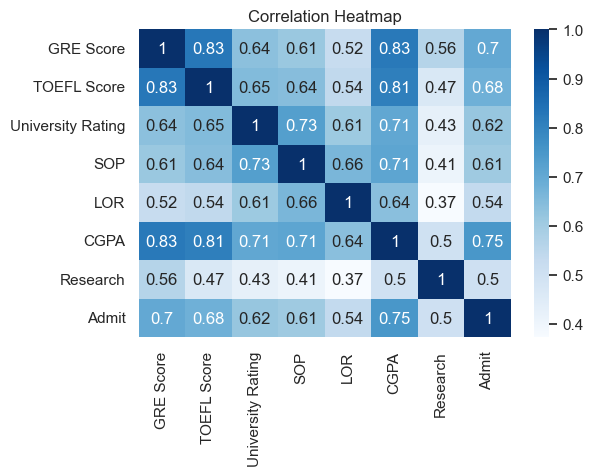

In [5]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

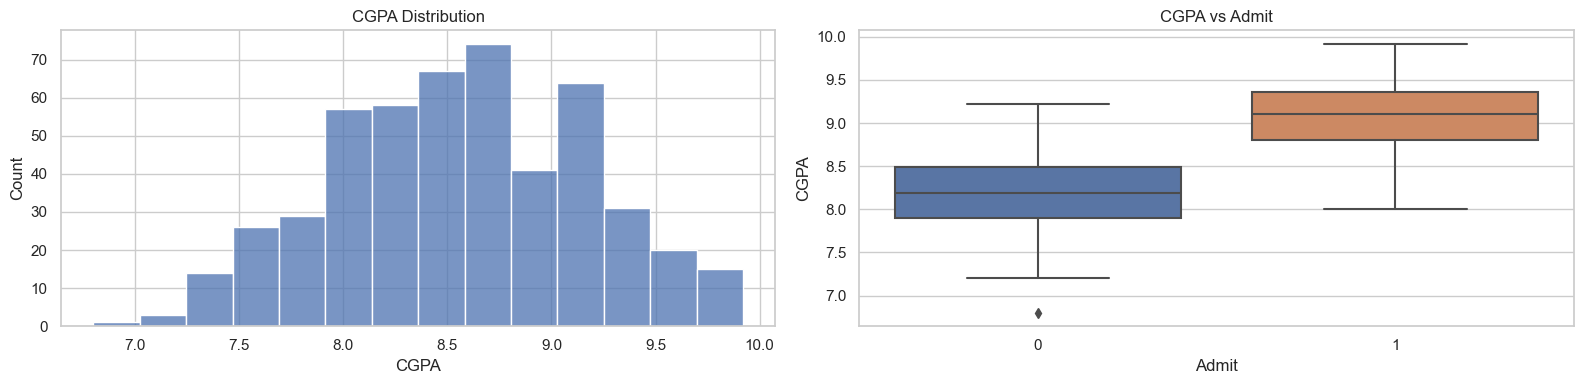

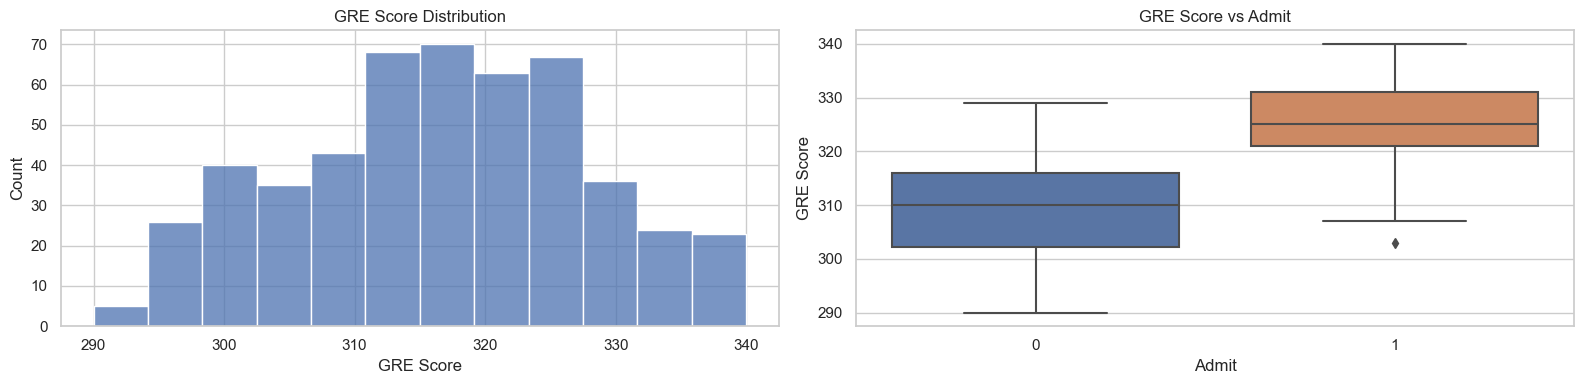

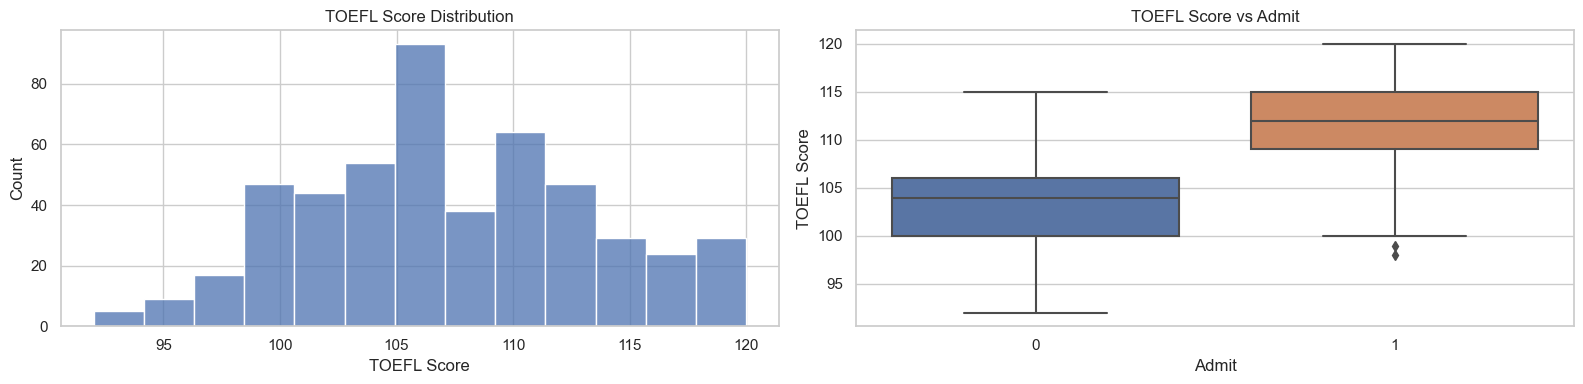

In [6]:
# Distribution and relationships
features_to_plot = ['CGPA', 'GRE Score', 'TOEFL Score']
for feature in features_to_plot:
    plt.figure(figsize=(16, 4))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature])
    plt.title(f'{feature} Distribution')

    # Relationship with Admit
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Admit', y=feature, data=df)
    plt.title(f'{feature} vs Admit')

    plt.tight_layout()
    plt.show()

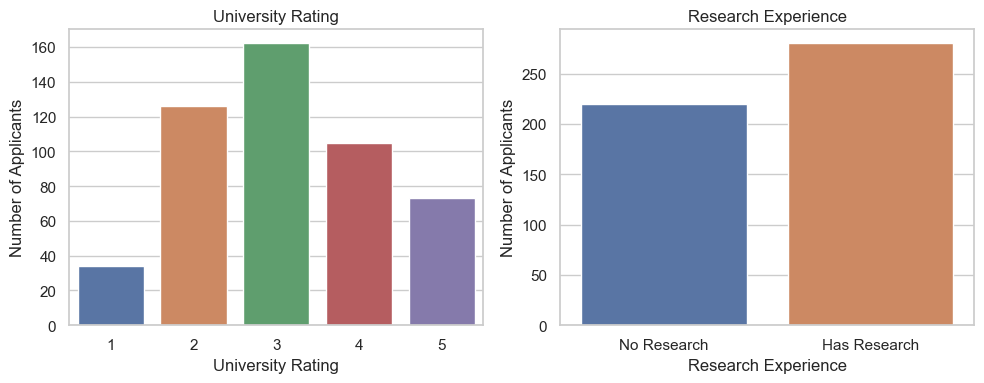

In [7]:
# Categorical Data Visualizations
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# University Rating count plot
sns.countplot(x='University Rating', data=df, ax=axes[0])
axes[0].set_title('University Rating')
axes[0].set_xlabel('University Rating')
axes[0].set_ylabel('Number of Applicants')

# Research Experience count plot
sns.countplot(x='Research', data=df, ax=axes[1])
axes[1].set_title('Research Experience')
axes[1].set_xlabel('Research Experience')
axes[1].set_ylabel('Number of Applicants')
axes[1].set_xticklabels(['No Research', 'Has Research'])

plt.tight_layout()
plt.show()

Prepare Features and Target Variable


In [8]:
# Prepare features and target variable
targets = df['Admit']
features = df.drop(columns=['Admit'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [9]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training and Evaluation

In [10]:
# Initialize models
logreg = LogisticRegression()
dec_tree = DecisionTreeClassifier(random_state=0, max_depth=6)
forest = RandomForestClassifier(n_estimators=110, max_depth=6, random_state=0)
svm = SVC(kernel='rbf', probability=True)

In [11]:
# Train models
logreg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(probability=True)

In [12]:
# Predict on test set
y_pred_logreg = logreg.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_forest = forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

Model Evaluation and Results

In [19]:
# Evaluate models
models = {
    'Logistic Regression': y_pred_logreg,
    'Decision Tree': y_pred_dec_tree,
    'Random Forest': y_pred_forest,
    'Support Vector': y_pred_svm
}

In [20]:
results = []

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])

                 Model  Accuracy  Precision     Recall   F1 Score
0  Logistic Regression      87.0  76.744186  91.666667  83.544304
1        Decision Tree      86.0  76.190476  88.888889  82.051282
2        Random Forest      90.0  82.500000  91.666667  86.842105
3       Support Vector      87.0  78.048780  88.888889  83.116883


Visualize Model Performance

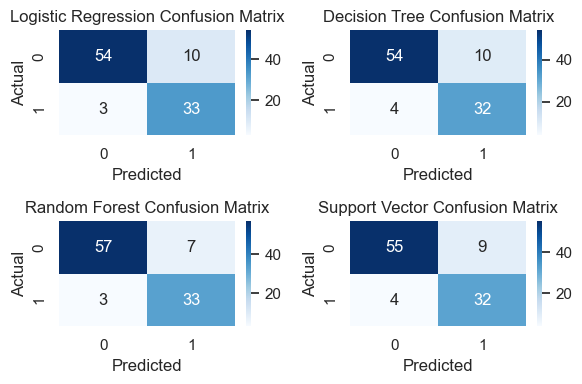

In [21]:
# Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.ravel()

for idx, model_name in enumerate(models.keys()):
    sns.heatmap(results[idx]['Confusion Matrix'], annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{model_name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

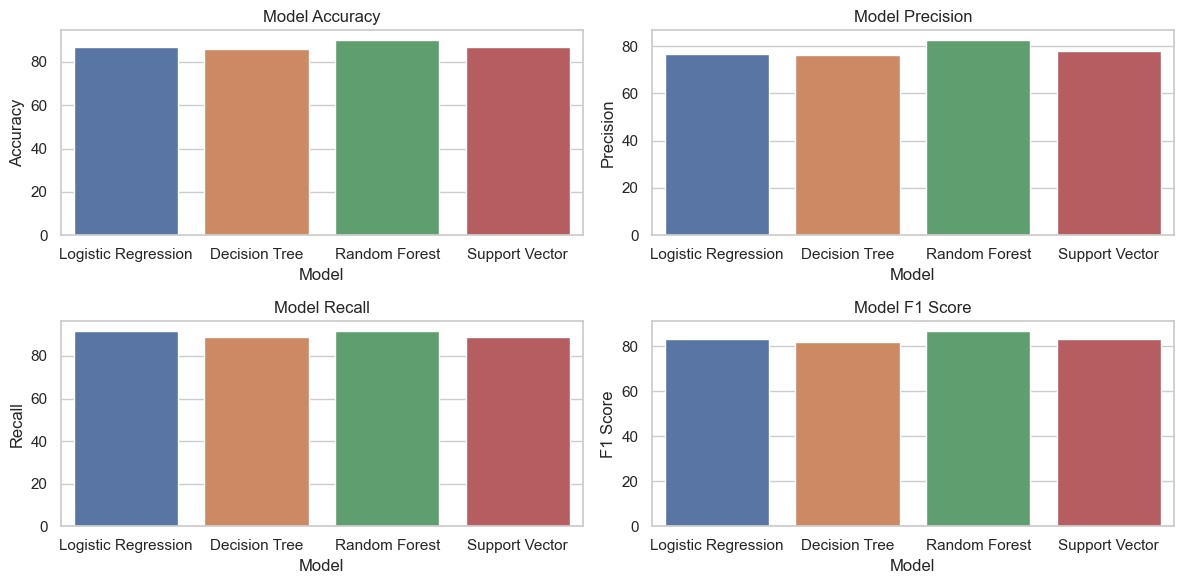

In [22]:
# Plot performance metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.ravel()

sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0])
axes[0].set_title('Model Accuracy')

sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[1])
axes[1].set_title('Model Precision')

sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[2])
axes[2].set_title('Model Recall')

sns.barplot(x='Model', y='F1 Score', data=results_df, ax=axes[3])
axes[3].set_title('Model F1 Score')

plt.tight_layout()
plt.show()